<a href="https://colab.research.google.com/github/Dante1902/Tort-Al/blob/main/%D0%92%D0%B8%D0%B4%D0%B5%D0%BE%D0%98%D0%B3%D1%80%D1%8B(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Чтение данных из CSV файла
df = pd.read_csv('video_games.csv')

In [3]:
# Посчитайте размерность данных
print("Размерность данных:", df.shape)

Размерность данных: (18800, 5)


In [4]:
# Посчитайте количество пропущенных значений в каждой переменной
print("Количество пропущенных значений:")
print(df.isnull().sum())

# Выведите тип данных каждой переменной и переконвертируйте при необходимости
print("Типы данных:")
print(df.dtypes)

Количество пропущенных значений:
name              0
platform          0
release_date      0
summary         114
user_review       0
dtype: int64
Типы данных:
name            object
platform        object
release_date    object
summary         object
user_review     object
dtype: object


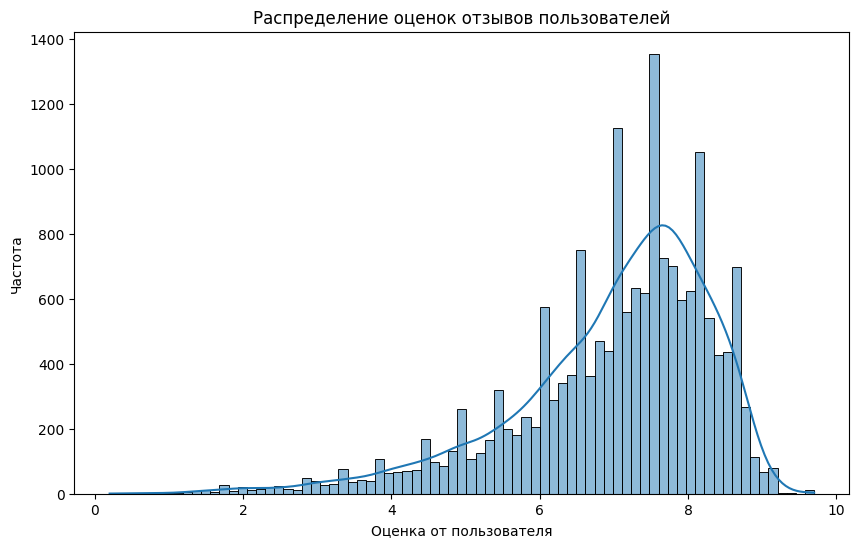

In [5]:
# Постройте график распределения оценок за отзывы пользователей
plt.figure(figsize=(10, 6))
# Remove non-numeric values from 'user_review' column
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')
sns.histplot(df['user_review'], kde=True)
plt.title('Распределение оценок отзывов пользователей')
plt.xlabel('Оценка от пользователя')
plt.ylabel('Частота')
plt.show()

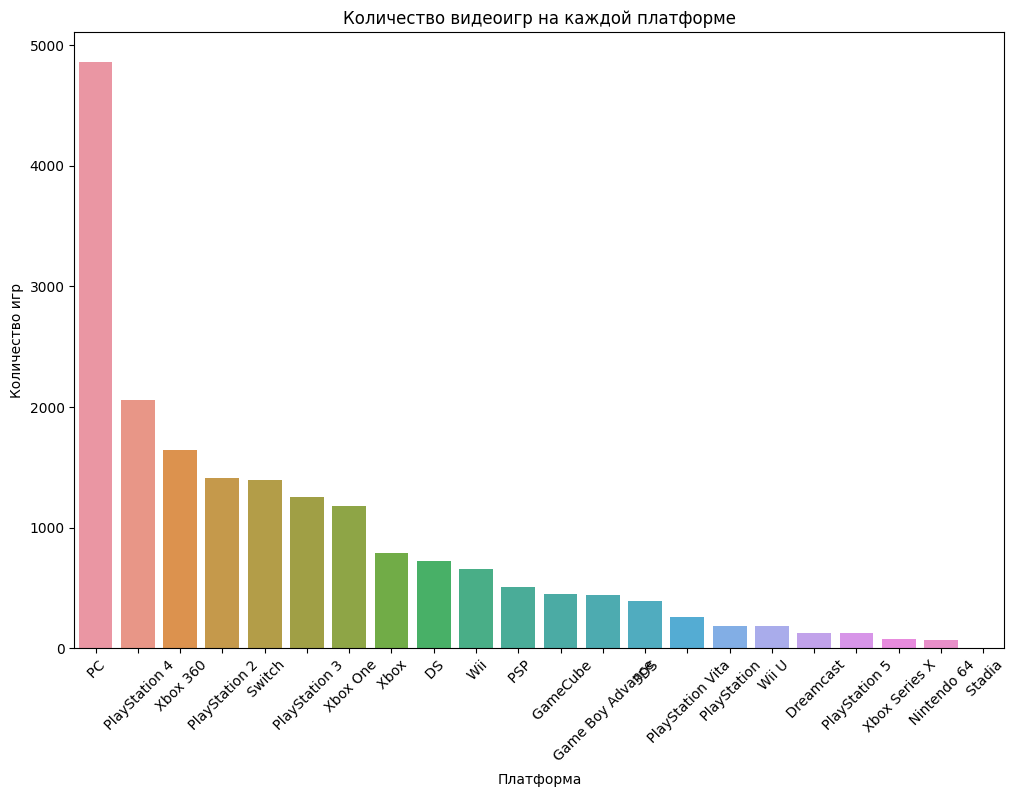

In [6]:
# Проанализируйте количество видеоигр на каждой платформе
plt.figure(figsize=(12, 8))
platform_count = df['platform'].value_counts()
sns.barplot(x=platform_count.index, y=platform_count.values)
plt.title('Количество видеоигр на каждой платформе')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

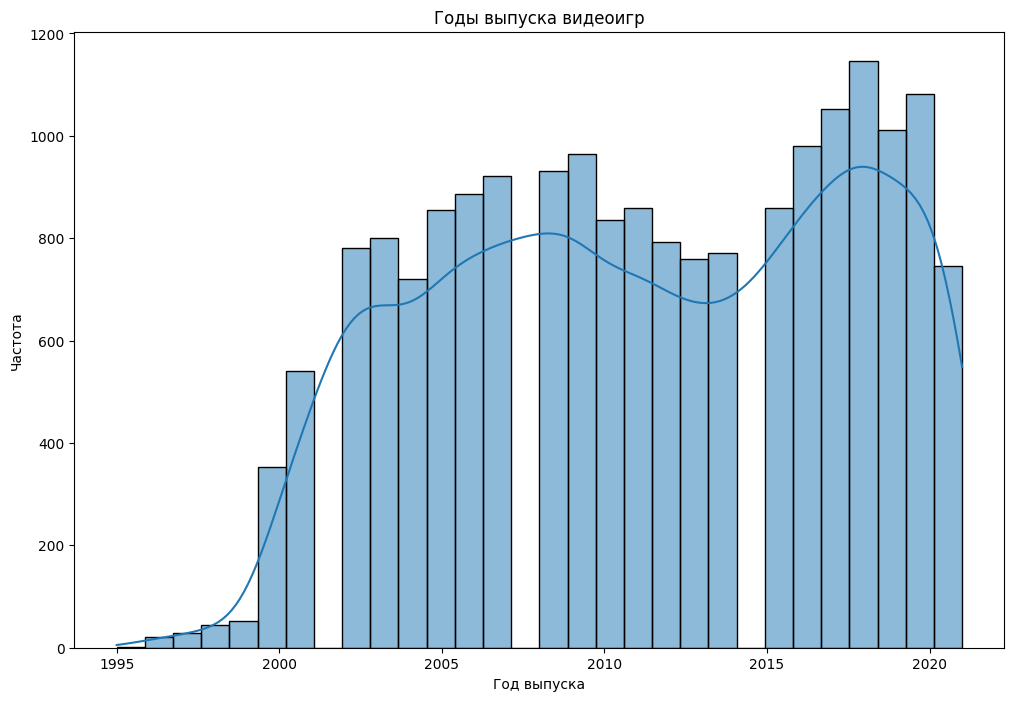

In [7]:
# Визуализируйте годы выпуска игр
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
plt.figure(figsize=(12, 8))
sns.histplot(df['release_year'], kde=True, bins=30)
plt.title('Годы выпуска видеоигр')
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.show()

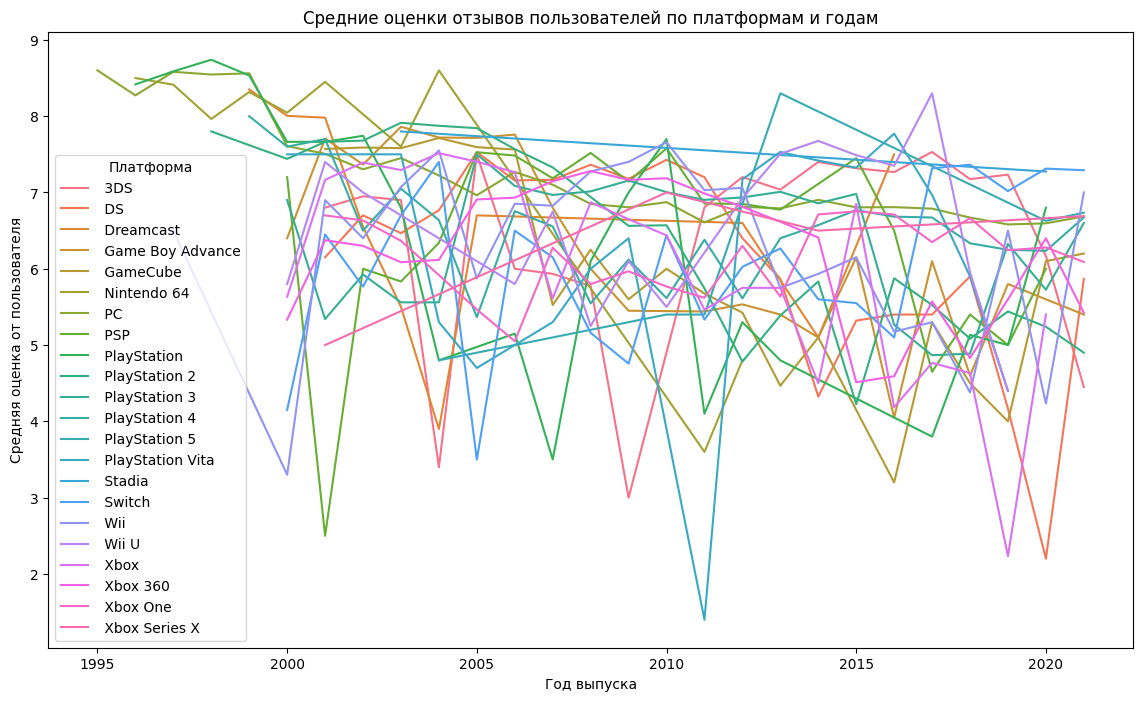

In [8]:
# Выведите средние оценки отзывов пользователей в разбивке по платформе и году выпуска
platform_year_avg = df.groupby(['platform', 'release_year'])['user_review'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='user_review', hue='platform', data=platform_year_avg)
plt.title('Средние оценки отзывов пользователей по платформам и годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя оценка от пользователя')
plt.legend(title='Платформа')
plt.show()